In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
def softmax(z):
    exp_z = np.exp(z-np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
    n_samples = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-9)) / n_samples
    # the 1e-9 is in case we get 0 inside of the log whice is error we add small value which will not attect the result
    return loss 

def compute_gradient(X, y_true, y_pred):
    n_samples = y_true.shape[0]
    dW = np.dot(X.T, (y_pred - t_true)) / n_samples
    return dW

def gradient_descent(X, y, W, learning_rate, epochs):
    losses = []
    for epoch in range(epochs):
        pred = softmax(np.dot(X,W))
        grad = -np.dot(X.T, (y-pred)) / X.shape[0]
        W -= learning_rate * grad
        loss = cross_entropy_loss(pred, y)
        losses.append(loss)

        if epoch%50 == 0:
            print(f"Epoch {epoch}: Loss = {loss}")

    return W, losses

In [3]:
def predict(X, W):
    logits = np.dot(X,W)
    y_pred_proba = softmax(logits)
    y_pred = np.argmax(y_pred_proba, axis=1)
    return y_pred

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)


In [4]:
# getting the data from
mnist = fetch_openml('mnist_784', version=1)
x, y = mnist['data'], mnist['target']

# converting to numpy to being consistent with indexes
x = x.to_numpy() / 255.0  # and normalizing the data
y = y.to_numpy()
y_int = y.astype(int)  # making sure the labels are integers
'''
# Set up a grid of plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    if i < 9:
        img = x[i].reshape(28, 28)
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Digit: {y[i]}")
        ax.axis('off')
    else:
        ax.axis('off') 

plt.tight_layout()
plt.show()
'''

C:\Users\danid\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


'\n# Set up a grid of plots\nfig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6, 6))\n\nfor i, ax in enumerate(axes.flat):\n    if i < 9:\n        img = x[i].reshape(28, 28)\n        ax.imshow(img, cmap=\'gray\')\n        ax.set_title(f"Digit: {y[i]}")\n        ax.axis(\'off\')\n    else:\n        ax.axis(\'off\') \n\nplt.tight_layout()\nplt.show()\n'

In [5]:
# converting labels to one hot vectors as instructed in the assigment
one_hot_labels = np.zeros((y_int.shape[0], 10))
for i, label in enumerate(y_int):
    one_hot_labels[i, label] = 1

# split data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, one_hot_labels, train_size=60000, test_size=10000,
                                                        random_state=42)

In [6]:
# adding the bias term
bias = np.ones((x_train.shape[0], 1))
x_train_bias = np.hstack((bias, x_train))

bias_test = np.ones((x_test.shape[0], 1))
x_test_bias = np.hstack((bias_test, x_test))

In [7]:
n_features = x_train_bias.shape[1] # 785 features (28*28=784 from the pictures + 1 from the bias
n_classes = 10 # 10 possiables classes which are the digits 0-9
W = np.random.rand(n_features, n_classes) * 0.01 # weights wector 


Epoch 0: Loss = 2.304002934913924
Epoch 50: Loss = 0.7914228256429016
Epoch 100: Loss = 0.6046575680144156
Epoch 150: Loss = 0.5287045196989063
Epoch 200: Loss = 0.4857235891731619
Epoch 250: Loss = 0.4573614613633375
Epoch 300: Loss = 0.4368997935303563
Epoch 350: Loss = 0.4212529667937073
Epoch 400: Loss = 0.4087881333022203
Epoch 450: Loss = 0.39855265766430087
Epoch 500: Loss = 0.3899495549531409
Epoch 550: Loss = 0.38258366515983216
Epoch 600: Loss = 0.3761818494151685
Epoch 650: Loss = 0.37054856393897795
Epoch 700: Loss = 0.36553968774552725
Epoch 750: Loss = 0.36104636966996045
Epoch 800: Loss = 0.35698466317231214
Epoch 850: Loss = 0.3532886512557272
Epoch 900: Loss = 0.3499057545299089
Epoch 950: Loss = 0.34679344879622653


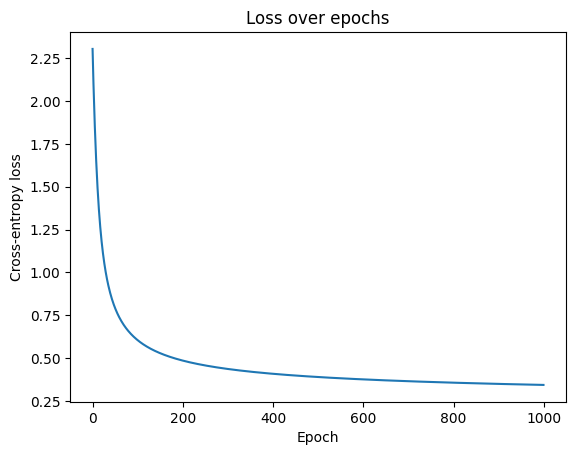

In [8]:
W, losses = gradient_descent(x_train_bias, y_train, W, learning_rate=0.1, epochs=1000)
# Plotting the loss over epochs
plt.plot(losses)
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Cross-entropy loss')
plt.show()

Test Accuracy: 90.43%


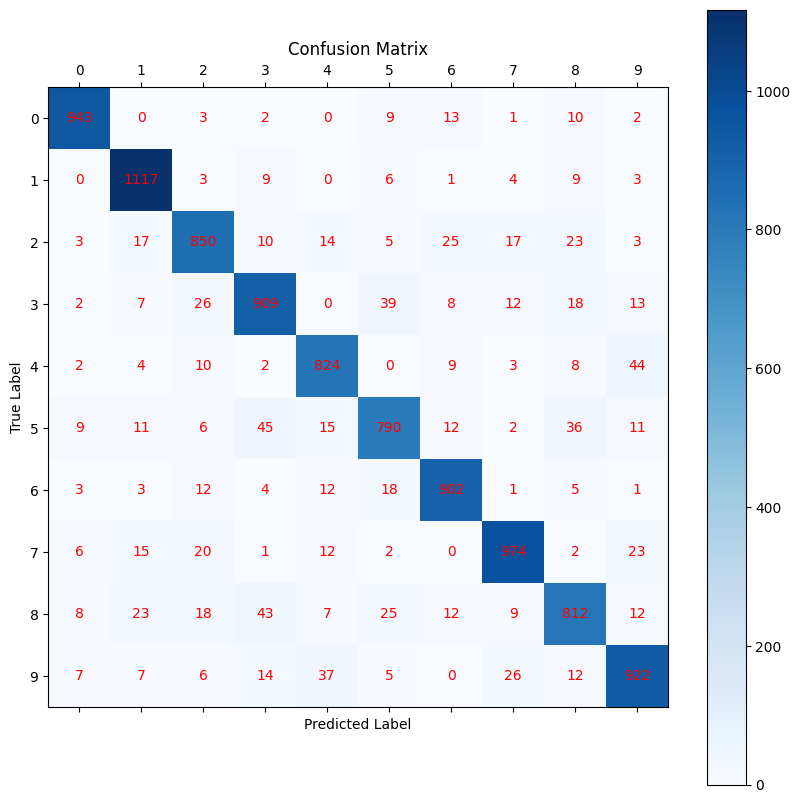

In [9]:
# Transform one-hot encoded test labels back to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Use the predict function to get predictions for the test set
y_pred = predict(x_test_bias, W)

# Calculate the accuracy of the predictions
test_accuracy = accuracy(y_test_labels, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Calculate and plot the confusion matrix
conf_mat = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(10, 10))
plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(n_classes), np.arange(n_classes))
plt.yticks(np.arange(n_classes), np.arange(n_classes))

# Optionally, include the numbers in the confusion matrix
for i in range(n_classes):
    for j in range(n_classes):
        plt.text(j, i, conf_mat[i, j], ha='center', va='center', color='red')

plt.show()

In [10]:
# now part C using linear Regression

In [11]:
# I will use one Vs all methond
# creating 10 diffrents predictors and choosing the one with the best result
def compute_weights(X, y, lambda_reg=0.01):
    identity_matrix = np.eye(X.shape[1])
    identity_matrix[0, 0] = 0
    XTX_reg_inv = np.linalg.inv(np.dot(X.T, X) + lambda_reg * identity_matrix)
    W = np.dot(np.dot(XTX_reg_inv, X.T), y)
    return W

In [12]:
# we need to solove the normal equation 
# W = inverse((transpose(X))X)*transpose(X)*y
# W - is the weights
# X is the feature matrix 
# y is the is the traget vector

In [13]:
y_train_int = np.argmax(y_train, axis=1)
weights_list = []
for digit in range(10):
    y_train_digit = (y_train_int == digit).astype(int)
    W_digit = compute_weights(x_train_bias, y_train_digit)
    weights_list.append(W_digit)

In [14]:
def predict(X, weights_list):
    predictions = [np.dot(X, W) for W in weights_list]
    predictions = np.stack(predictions, axis=-1)
    y_pred = np.argmax(predictions, axis=1)
    return y_pred


Test Accuracy: 85.17%


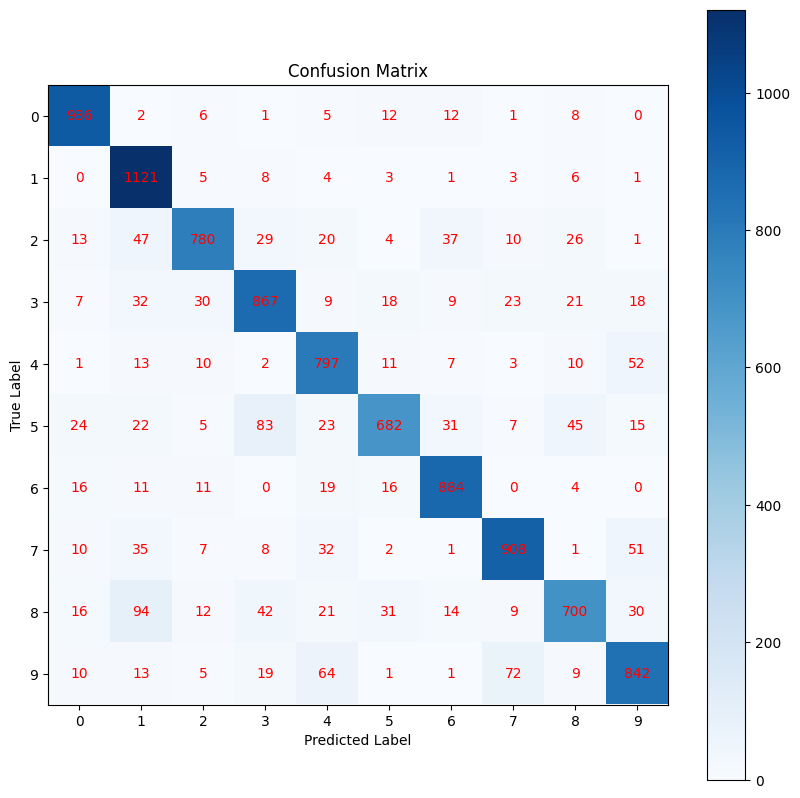

In [15]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

y_test_labels = np.argmax(y_test, axis=1)
y_pred = predict(x_test_bias, weights_list)
test_accuracy = accuracy(y_test_labels, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
conf_mat = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(10, 10))
plt.imshow(conf_mat, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10), np.arange(10))
plt.yticks(np.arange(10), np.arange(10))

# Optionally, include the numbers in the confusion matrix
for i in range(10):
    for j in range(10):
        plt.text(j, i, conf_mat[i, j], ha='center', va='center', color='red')

plt.show()
